In [1]:
import eyes17.eyes
import matplotlib.pyplot as plt
import numpy as np
import json

p = eyes17.eyes.open()

In [2]:
p.set_pv1(5)

5.0

In [3]:
def read_input(time = 2, dt = 4000):
    x, y = p.capture1('A1',int(time*1000000/dt),int(dt))
    return np.array(x), np.array(y)

In [23]:
t, val = read_input(25)

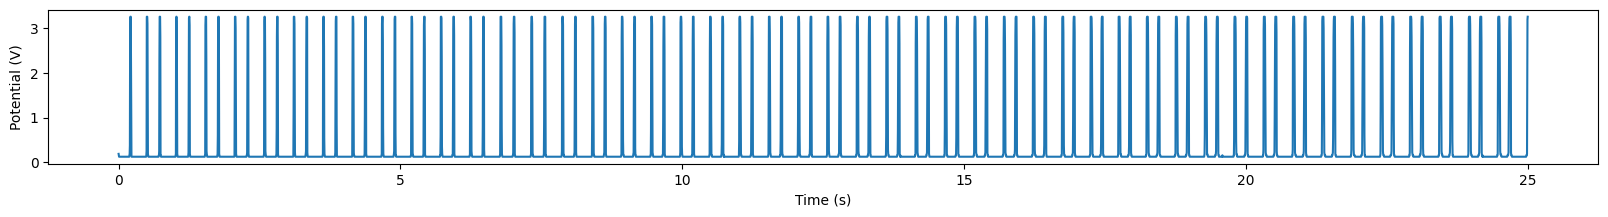

In [24]:
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(t/1000, val)
plt.xlabel('Time (s)')
plt.ylabel('Potential (V)')
plt.savefig('pend.png')
plt.show()

In [3]:
def times_between_peaks(t, val):
    val = val > 3  # converting to binary values
    
    i = 0 # index of t
    got_first = False
    ts = []
    while i < len(val)-1:
        # finding the first peak is important
        if not got_first:
            if val[i] == True and val[i+1] == False:
                t0 = t[i]
                got_first = True  # first peak found
        else:
            if val[i] == True and val[i+1] == False:
                ts.append(t[i] - t0)
                t0 = t[i]
        i += 1
    
    # removing the last peak if oscillations are not complete
    if len(ts)%2: ts.pop()  # if len(ts) is odd, remove last
    return np.array(ts)  # in milliseconds

In [24]:
times = times_between_peaks(t, val)
T = times.mean()/500
T

0.5185333333333334

In [5]:
def g(T, l=9.5e-2):
    return 2*l/3 * (2*np.pi/T)**2

In [22]:
g(T, 10e-2)

9.789735456228186

In [22]:
# write the data (val and T) to a json file
with open("pend6.json", "w") as f:
    json.dump({"val": val.tolist(), "t": t.tolist()}, f)